In [4]:
%pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.


# Sequential 클래스 이용

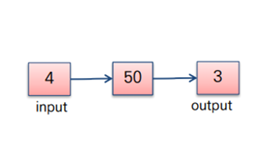

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential()
model.add(Input(shape=(4,)))  # 입력되는 한개 데이터는 4개
model.add(Dense(50, activation="relu"))  # 레이어에 50개의 뉴런, 활성화 함수는 relu
model.add(
    Dense(3, activation="softmax")
)  # 레이어에 3개 뉴런 (출력층), 활성화 함수 softmax
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

# 함수형 API 이용

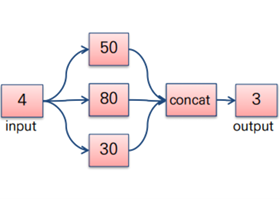

In [6]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import concatenate, Activation

input = Input(shape=(4,))
dense1 = Dense(50, activation="relu")(input)
dense2 = Dense(80, activation="relu")(input)
dense3 = Dense(30, activation="relu")(input)
x = concatenate([dense1, dense2, dense3])  # 생성한 3개의 레이어를 병렬처리함
output = Dense(3, activation="softmax")(x)
model = Model(inputs=input, outputs=output)
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 50)        │        250 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 80)        │        400 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        150 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 160)       │          0 │ dense_4[0][0],    │
│ (Concatenate)       │                   │            │ dense_5[0][0],    │
│                     │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 3)         │        483 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,283 (5.01 KB)

 Trainable params: 1,283 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

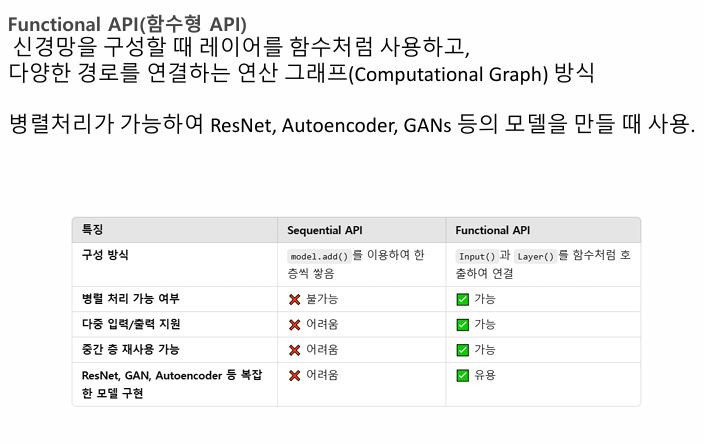

# Iris 데이터셋으로 분류모델 적용하기

## Sequential 방식

In [7]:
model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(50, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,873 (7.32 KB)

 Trainable params: 1,873 (7.32 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, y = iris.data, iris.target
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6965 - loss: 1.7133  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6361 - loss: 1.5899 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6705 - loss: 1.2251 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6643 - loss: 1.0330 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6653 - loss: 0.8644 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6722 - loss: 0.7662 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8793 - loss: 0.7342 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8439 - loss: 0.7056 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8900 - loss: 0.6730 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9175 - loss: 0.6484 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8224 - loss: 0.6305 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8200 - lo

In [9]:
model.evaluate(X_test, y_test)  # 손실값과 정확도 출력

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0593 


[0.05264779552817345, 1.0]

## 손실함수, 유닛수, 활성함수, 옵티마이저를 변경해서 결과비교

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. 데이터 로딩 및 정규화
iris = load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. 실험 구성 리스트
configs = [
    {"units": [50, 30], "activation": "relu", "optimizer": Adam(0.001)},
    {"units": [3, 5], "activation": "relu", "optimizer": Adam(0.001)},
    {"units": [10, 8], "activation": "sigmoid", "optimizer": Adam(0.001)},
    {"units": [10, 8], "activation": "relu", "optimizer": SGD(0.01)},
    {"units": [10, 8], "activation": "relu", "optimizer": RMSprop(0.001)},
]

# 3. 결과 저장
results = []

for cfg in configs:
    model = Sequential()
    model.add(Input(shape=(4,)))
    model.add(Dense(cfg["units"][0], activation=cfg["activation"]))
    model.add(Dense(cfg["units"][1], activation=cfg["activation"]))
    model.add(Dense(3, activation="softmax"))

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=cfg["optimizer"],
        metrics=["accuracy"],
    )

    model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    results.append(
        {
            "유닛": f"{cfg['units']}",
            "활성함수": cfg["activation"],
            "옵티마이저": cfg["optimizer"].__class__.__name__,
            "손실(loss)": round(loss, 4),
            "정확도(accuracy)": round(accuracy, 4),
        }
    )

# 4. 결과 출력
df = pd.DataFrame(results)
print(df)

         유닛     활성함수    옵티마이저  손실(loss)  정확도(accuracy)
0  [50, 30]     relu     Adam    0.1224         1.0000
1    [3, 5]     relu     Adam    1.1092         0.3667
2   [10, 8]  sigmoid     Adam    0.7009         0.8000
3   [10, 8]     relu      SGD    0.4653         0.7000
4   [10, 8]     relu  RMSprop    0.3151         0.9667


## 함수형 API 방식

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn import datasets
from sklearn.model_selection import train_test_split

# 1. 입력 정의
input_tensor = Input(shape=(4,))

# 2. 은닉층 연결
x = Dense(50, activation="relu")(input_tensor)
x = Dense(30, activation="relu")(x)

# 3. 출력층 연결
output_tensor = Dense(3, activation="softmax")(x)

# 4. 모델 정의
model = Model(inputs=input_tensor, outputs=output_tensor)

# 5. 데이터 준비
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 6. 모델 컴파일 및 학습
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"]
)
model.fit(X_train, y_train, epochs=200)

# 7. 평가
model.evaluate(X_test, y_test)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3296 - loss: 2.3098  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2775 - loss: 1.8225 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2220 - loss: 1.3643 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3868 - loss: 1.1373
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.3514 - loss: 1.0611
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.3479 - loss: 1.0262
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5116 - loss: 0.9846 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5855 - loss: 0.9335 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5404 - loss: 0.8987 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4270 - loss: 0.8475 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5452 - loss: 0.8434 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6382 - l

[0.05686855688691139, 1.0]

In [12]:
# 모델 저장
model.save("my_model.keras")
print("모델이 저장되었습니다.")

모델이 저장되었습니다.


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model

# 저장된 모델 로드
loaded_model = load_model("my_model.keras")
print("모델이 성공적으로 로드 되었습니다.")

# 새로운 입력 데이터 (iris 데이터는 4개의 특성을 가짐)
X_new = np.array([4.6, 3.6, 1.0, 0.2]).reshape(1, -1)  # (1,4 형태로 변환)
X_new.shape

# 예측 수행
predictions = loaded_model.predict(X_new)

# 예측 결과 출력
print(f"예측된 확률 분포 : {predictions}")
print(f"예측된 클래슨 : {np.argmax(predictions)}")

모델이 성공적으로 로드 되었습니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
예측된 확률 분포 : [[9.9993026e-01 6.9771224e-05 6.1846878e-10]]
예측된 정답 : 0


In [21]:
X_new = np.array(
    [[4.6, 3.6, 1.0, 0.2], [5.0, 3.4, 1.2, 0.3], [4.8, 3.1, 1.3, 0.2]]
).reshape(3, -1)
print(X_new.shape)

(3, 4)


## iris 데이터셋 으로 학습, 에시 데이터 만들어서 테스트

In [58]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# 1. 입력 정의
input_tensor = Input(shape=(4,))

# 2. 은닉층 연결
x = Dense(30, activation="relu")(input_tensor)
x = Dense(20, activation="relu")(x)
x = Dense(10, activation="relu")(x)

# 3. 출력층 연결
output_tensor = Dense(3, activation="softmax")(x)

# 4. 모델 정의
model = Model(inputs=input_tensor, outputs=output_tensor)

# 5. 데이터 준비
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. 모델 컴파일 및 학습
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"]
)
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# 7. 평가
model.evaluate(X_test, y_test)

predict = model.predict(X_test)
predict_cls = np.argmax(predict, axis=1)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.1488 - loss: 1.1386 - val_accuracy: 0.3111 - val_loss: 1.0722
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2563 - loss: 1.0828 - val_accuracy: 0.3556 - val_loss: 1.0175
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3753 - loss: 1.0349 - val_accuracy: 0.6222 - val_loss: 0.9643
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5099 - loss: 0.9928 - val_accuracy: 0.7111 - val_loss: 0.9153
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6188 - loss: 0.9440 - val_accuracy: 0.7556 - val_loss: 0.8699
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6476 - loss: 0.9083 - val_accuracy: 0.7556 - val_loss: 0.8277
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6628 - loss: 0.8633 - val_accuracy: 0.7778 - val_loss: 0.7888
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7301 - loss: 0.8286 - val_accuracy: 0.8000 - val_loss:

In [38]:
# 7. 새로운 데이터 만들어서 예측
flower = {0: "setosa", 1: "versicolor", 2: "virginica"}
X_test = np.array(
    [
        [5.1, 3.5, 1.4, 0.2],
        [4.9, 3.0, 1.4, 0.2],
        [5.8, 2.7, 5.1, 1.9],
        [6.0, 3.4, 4.5, 1.6],
        [5.4, 3.9, 1.7, 0.4],
        [6.2, 2.9, 4.3, 1.3],
        [7.1, 3.0, 5.9, 2.1],
        [5.0, 3.4, 1.5, 0.2],
        [6.3, 3.3, 6.0, 2.5],
        [5.6, 2.8, 4.9, 2.0],
    ]
)

y_pred = model.predict(X_test)
for index, pred in enumerate(y_pred):
    print(f"{index + 1} 번째 예측\n확률 분포 {pred}")
    print(f"예측 종류 {flower[np.argmax(pred)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1 번째 예측
확률 분포 [3.0862264e-09 9.9999678e-01 3.1763493e-06]
예측 종류 versicolor
2 번째 예측
확률 분포 [1.1206339e-08 9.9998403e-01 1.5975058e-05]
예측 종류 versicolor
3 번째 예측
확률 분포 [5.122378e-20 2.655665e-13 1.000000e+00]
예측 종류 virginica
4 번째 예측
확률 분포 [7.403971e-18 2.358358e-11 1.000000e+00]
예측 종류 virginica
5 번째 예측
확률 분포 [1.8921702e-09 9.9994981e-01 5.0133247e-05]
예측 종류 versicolor
6 번째 예측
확률 분포 [3.9877815e-17 1.1459118e-10 1.0000000e+00]
예측 종류 virginica
7 번째 예측
확률 분포 [3.2852835e-23 2.0702802e-15 1.0000000e+00]
예측 종류 virginica
8 번째 예측
확률 분포 [5.4814224e-09 9.9998736e-01 1.2684345e-05]
예측 종류 versicolor
9 번째 예측
확률 분포 [2.5206446e-23 7.5440492e-16 1.0000000e+00]
예측 종류 virginica
10 번째 예측
확률 분포 [2.0044385e-19 6.5767227e-13 1.0000000e+00]
예측 종류 virginica


In [60]:
print(classification_report(y_test, predict_cls))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



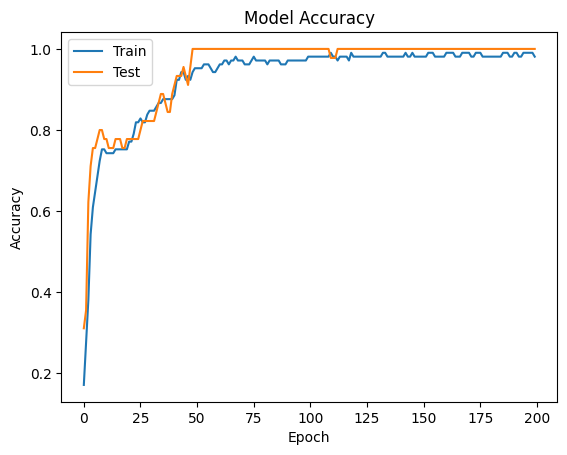

In [61]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()